# Assignment 1


# importing packages

In [2]:
from  sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, silhouette_score

import numpy as np\

import pandas as pd

from plotnine import *

# reading dataset

In [3]:
iris_data = pd.read_csv("https://raw.githubusercontent.com/connoralydon/datasets/main/iris-1.csv")

# summary info about data

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# cleaning the dataframe

In [7]:
iris_data = iris_data.drop("Id", axis = 1)
    # dropping Id variable

In [8]:
iris_data.columns
    # variable is dropped

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### adding binary variable for species

In [9]:
# Change Iris-setosa to 1 and Not-Iris-setosa to 0
Species_binary = []

for val in iris_data["Species"]:
    if val == "Iris-setosa":
        Species_binary.append(1)
    elif val == "Not-Iris-setosa":
        Species_binary.append(0)

iris_data["Species_binary"] = Species_binary

In [10]:
# Check if the species was converted from obj to int
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLengthCm   150 non-null    float64
 1   SepalWidthCm    150 non-null    float64
 2   PetalLengthCm   150 non-null    float64
 3   PetalWidthCm    150 non-null    float64
 4   Species         150 non-null    object 
 5   Species_binary  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
# observe the different values used for species - 2 different values: 0, 1
iris_data['Species'].unique()

array(['Iris-setosa', 'Not-Iris-setosa'], dtype=object)

In [12]:
iris_data['Species_binary'].unique()

array([1, 0])

#### missing values?

In [13]:
iris_data.isnull().sum()

SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Species           0
Species_binary    0
dtype: int64

#### count number of each class

In [14]:
count_dict = {"iris-setosa": 0,
              "not-iris-setosa": 0}

for val in iris_data["Species_binary"]:
    if val == 1:
        count_dict["iris-setosa"] += 1
    elif val == 0:
        count_dict["not-iris-setosa"] += 1
        
print(count_dict)

{'iris-setosa': 50, 'not-iris-setosa': 100}


# model variables

In [15]:
predictors = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

output = "Species"

# creating training and testing data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris_data[predictors], iris_data[output], test_size=0.2) 

# normalizing data

In [17]:
z = StandardScaler() #standard scaling object

# fitting scaler object to training data then outputting it
X_train = z.fit_transform(X_train)
# fit the testing data on the distributions found in the training data
X_test = z.transform(X_test)

# initial SVM model

In [18]:
svm_1 = SVC()

# training initial model

In [19]:
svm_1.fit(X_train, y_train)

SVC()

# getting predicted values

In [20]:
y_preds = svm_1.predict(X_test)

# evaluating model predictions

using a confusion matrix:
this model does a good job classifying everything. It does misclassify one point saying it is not-iris-setosa while it is iris-setosa.

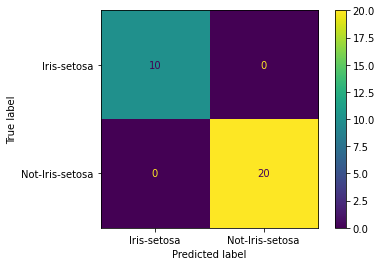

In [21]:
plot_confusion_matrix(svm_1, X_test, y_test)

the model performs very well. Becuase there are so few samples in this dataset it is a hard choice to do much more work because the returns are going to be diminishing.

# Kfold

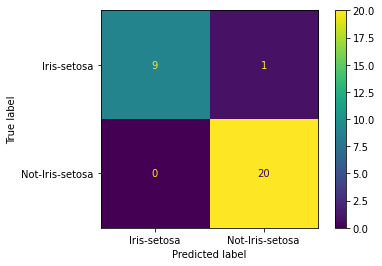

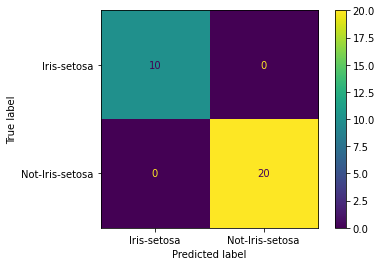

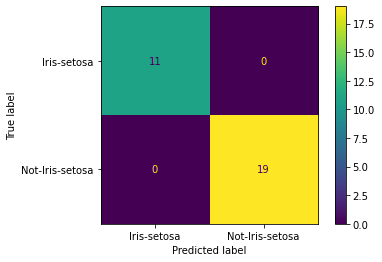

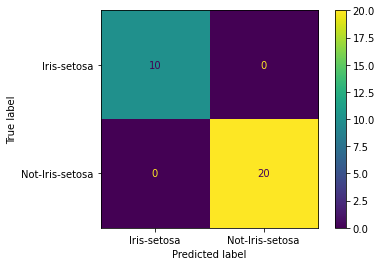

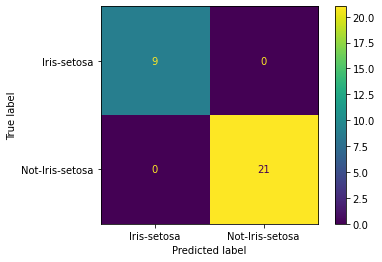

In [22]:

X = iris_data[predictors]
y = iris_data['Species']
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train = z.fit_transform(X_train)
    X_test = z.transform(X_test)
    
    svm = SVC()
    svm.fit(X_train, y_train)

    plot_confusion_matrix(svm, X_test, y_test)


# kfold results

again we do the same model 5 times and see what the results are. there is no difference here, the model performs perfectly in each fold. the data in each fold is shuffled to avoid an unbalanced set. the data is a block of not-iris-setosa & a block of iris-setosa.

# plotting data

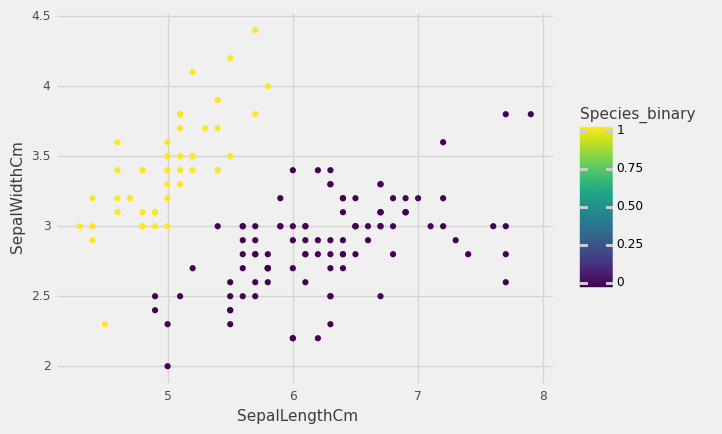

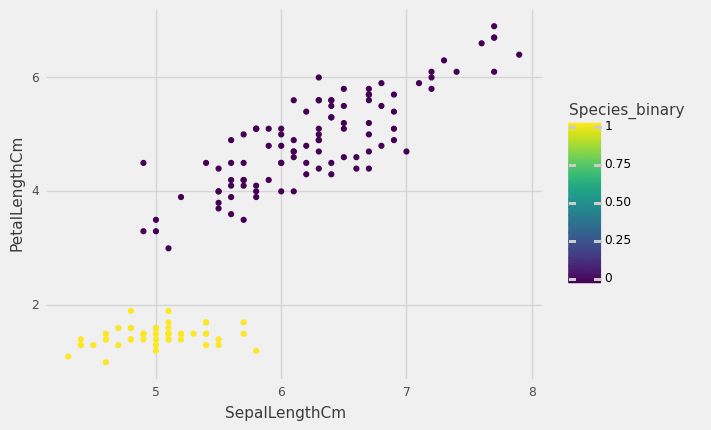

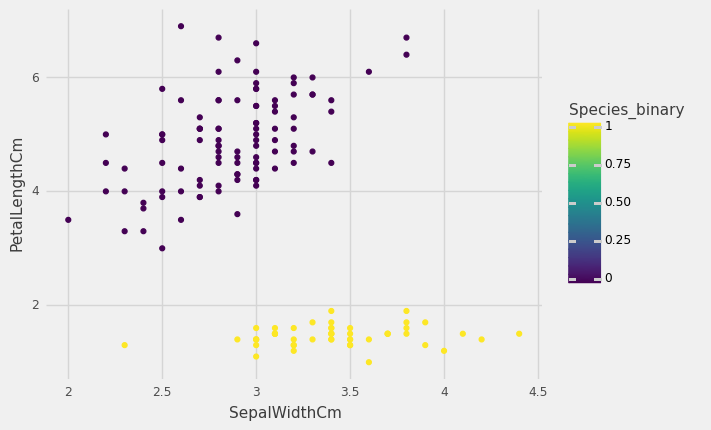

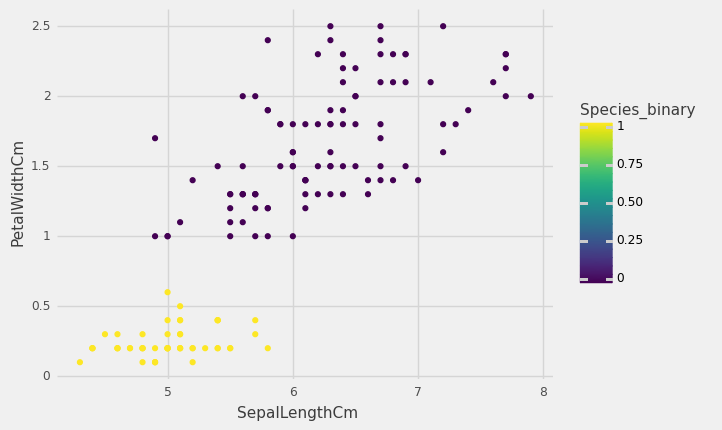

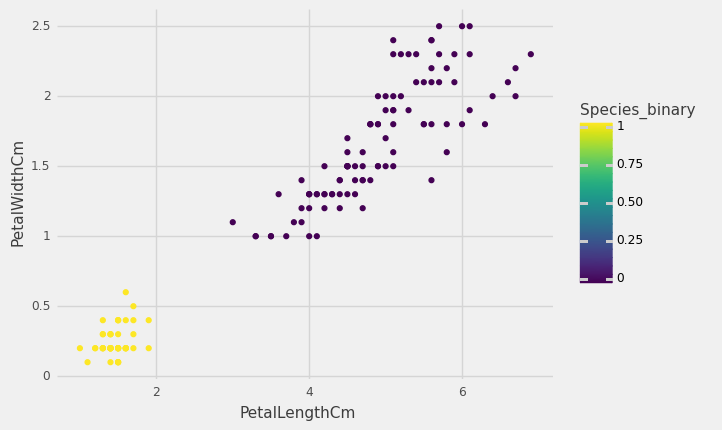

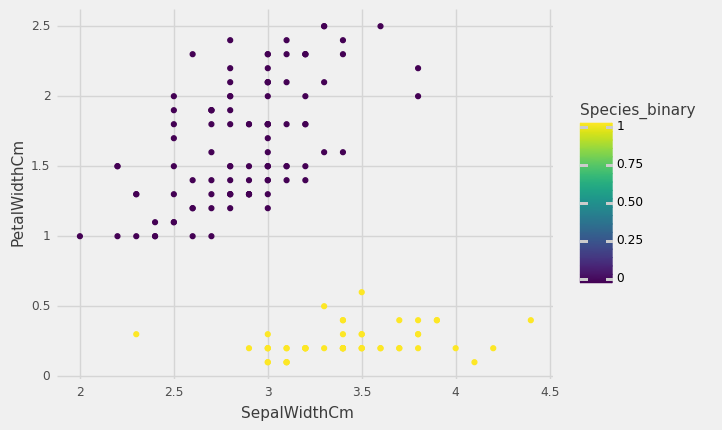

In [23]:
def plot_2_vars(f1, f2):
    return (ggplot(iris_data, aes(x=f1, y=f2, color="Species_binary"))
        + geom_point()
        + theme_538()
        )
    
print(plot_2_vars('SepalLengthCm', 'SepalWidthCm'))
print(plot_2_vars('SepalLengthCm', 'PetalLengthCm'))
print(plot_2_vars('SepalWidthCm', 'PetalLengthCm'))
print(plot_2_vars('SepalLengthCm', 'PetalWidthCm'))
print(plot_2_vars('PetalLengthCm', 'PetalWidthCm'))
print(plot_2_vars('SepalWidthCm', 'PetalWidthCm'))

this data all looks linearly separable. All except sepal width against petal width/length. this linearly separable data is great for an svm because it can draw a simple line between the data

# grid searching for optimal hyper parameters

three hyper parameters bing tested are C (lambda), gamma, & the kernel. 

C (lambda) is a hyperparameter that is a values that helps the model deal with misclassifications
gamma is a hyperparameter that helps the model deal with how much each point affects the model training and testing
kernel is a hyperparameter that deals with what dimensions the data will be represneted in. in this case, linear will be fine because the data is clearly linearly separable. in other cases, it may be beneficial to represent the data in a higher dimension

In [24]:
#not sure about data patterns, use RBF kernel to start
#will have to do hyperparameter tuning - GridSearchCV
svm = SVC()
hyper_vals = {"C":[0.001, 0.01, 0.1, 1, 5, 10],
              "gamma":[0.00001, 0.0001, 0.001, 0.01, 0.1],
              "kernel":['linear', 'poly', 'rbf', 'sigmoid']}
hyper_tune = GridSearchCV(svm, hyper_vals, cv = 5)
hyper_tune.fit(X_train, y_train)
print("Best CV params", hyper_tune.best_params_)
#svm.fit(X_train, y_train)

#find best hyper params and accuracy
print("score of model: ", hyper_tune.score(X_train, y_train))

Best CV params {'C': 0.01, 'gamma': 1e-05, 'kernel': 'linear'}
score of model:  1.0


# conclusion

this data is a good case for a  support vector machine. the fact that it is linearly separable makes it an obvious candidate for a linear SVM. even if the data were not linearly separable, kernel transformations can create avenues for a SVM to work effectively.